<a href="https://colab.research.google.com/github/Robin-Rego/Mobile-price-range-prediction/blob/main/Robin_Rego_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
 actual price but a price range indicating how high the price is**

**Data Description -**


Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import math
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter-Project/Mobile Price Range Prediction-Classification ML/data_mobile_price_range (1).csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.shape

(2000, 21)

From this we can see that the dataset is a combination of 2000 Rows and 21 Columns

#**Data Cleaning**

In [7]:
#Let's check for Null Values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

NOTE:
* The minimum value of sc_width and px_height is 0. which is not possible in any mobile. We need to handle this mismatch.

In [8]:
# Let's check the numbers of screen width with value as 0.
print(df[df['sc_w']==0].shape[0])

180


In [9]:
# Let's check the numbers of px_hieght with value as 0.
print(df[df['px_height']==0].shape[0])

2


In [10]:
# As there are only 2 observations having px_height=0. so we will drop it.
df = df[df['px_height']!=0]

In [11]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#**KNN Imputer**

In [12]:
# import library
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [13]:
# Checking shape
df.shape

(1998, 21)

In [14]:

# Let's check if sc_w has value 0.
df[df['sc_w']==0].shape[0]

0

As we can see there are no null values.

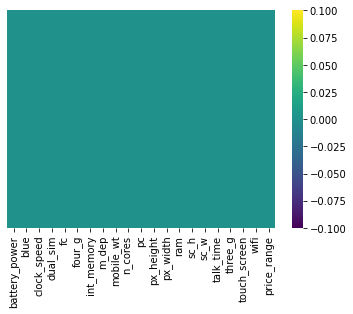

In [15]:
# Let's plot a heatmap to check the Nan values
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [17]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,1998.0,1238.391391,439.369721,501.0,851.25,1226.0,1615.00,1998.0
blue,1998.0,0.494995,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,1998.0,1.521722,0.816240,0.5,0.70,1.5,2.20,3.0
dual_sim,1998.0,0.510010,0.500025,0.0,0.00,1.0,1.00,1.0
fc,1998.0,4.308809,4.343101,0.0,1.00,3.0,7.00,19.0
four_g,1998.0,0.521021,0.499683,0.0,0.00,1.0,1.00,1.0
int_memory,1998.0,32.057558,18.141468,2.0,16.00,32.0,48.00,64.0
m_dep,1998.0,0.501902,0.288411,0.1,0.20,0.5,0.80,1.0
mobile_wt,1998.0,140.262763,35.404007,80.0,109.00,141.0,170.00,200.0
n_cores,1998.0,4.519019,2.287627,1.0,3.00,4.0,7.00,8.0


#**Data Analyzing**

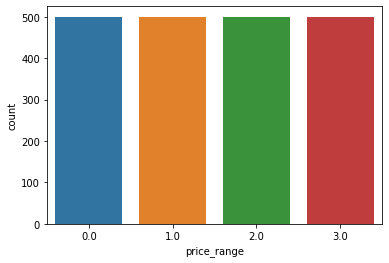

In [18]:
sns.countplot(x = "price_range", data = df)
#0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [19]:
battery_power_2 = df['battery_power'].unique()
print(battery_power_2)

[ 842. 1021.  563. ... 1139. 1467.  858.]


In [20]:
len(battery_power_2)

1093

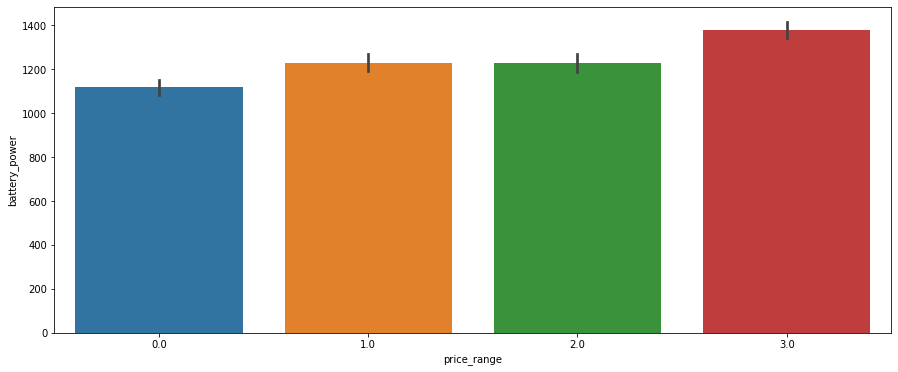

In [21]:
# Let's check the Price_Range with Battery
plt.figure(figsize=(15,6))
sns.barplot(x = "price_range",y = "battery_power", data = df)

So as we can see that as the battery power increases there is increase in the price range of mobile.
NOTE: Mobiles of 1(medium cost) and 2(high cost) have almost the same battery power

In [22]:
# Let's have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

In [23]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

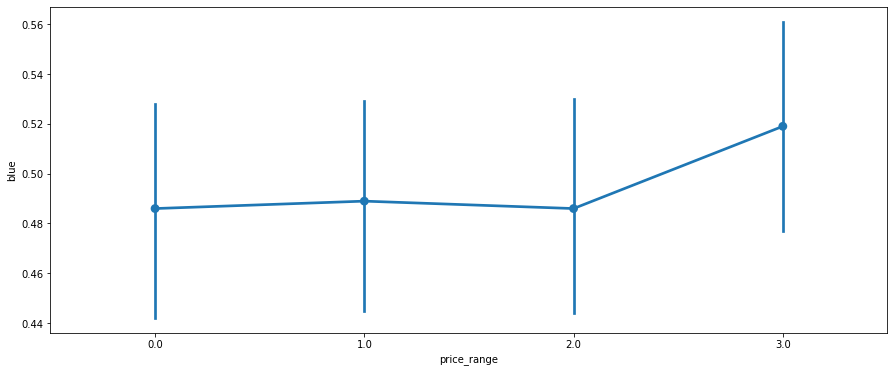

In [24]:
# Let's check the Price_Range with Blue
plt.figure(figsize=(15,6))
sns.pointplot(x = "price_range",y = "blue", data = df)

([<matplotlib.patches.Wedge at 0x7f8e8b6a4710>,
 [Text(-1.099864024081323, -0.017295332654766658, 'Bluetooth Supported'),
  Text(1.099864024081323, 0.017295332654766522, 'Not supported')],
 [Text(-0.5999258313170852, -0.009433817811690904, '50.5%'),
  Text(0.5999258313170852, 0.009433817811690828, '49.5%')])

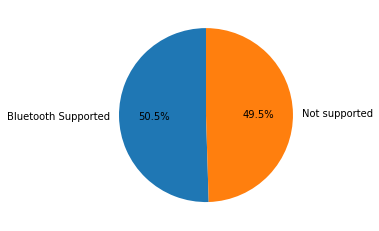

In [25]:
#Let's check the percentage of phone that support Bluetooth
labels = ["Bluetooth Supported",'Not supported']
values=df['blue'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['blue'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

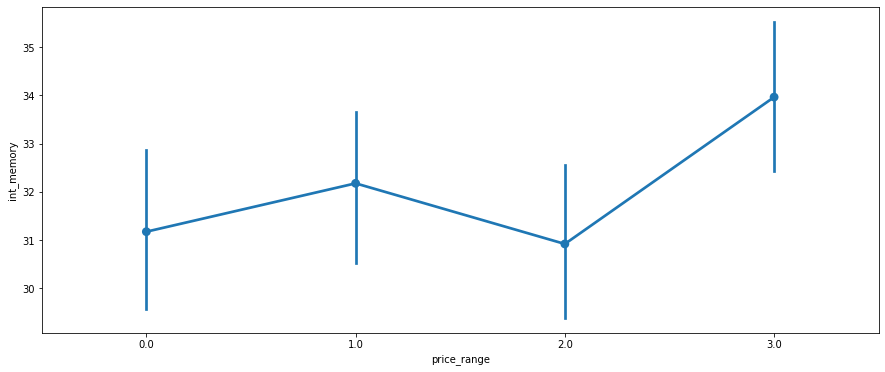

In [26]:
# Let's check the Price_Range with int_memory
plt.figure(figsize=(15,6))
sns.pointplot(x = 'price_range', y="int_memory", data=df)

([<matplotlib.patches.Wedge at 0x7f8e8b5ef490>,
 [Text(-0.7498185682064654, -0.8048429131034244, '3G-supported'),
  Text(0.74981849285163, 0.804842983306502, 'Not supported')],
 [Text(-0.40899194629443564, -0.4390052253291405, '76.1%'),
  Text(0.4089919051917982, 0.43900526362172826, '23.9%')])

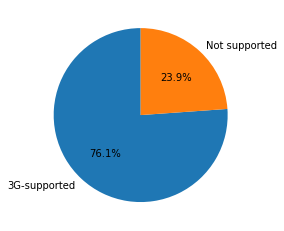

In [27]:
#Let's check the percentage of phone that support 3G
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['three_g'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

([<matplotlib.patches.Wedge at 0x7f8e8b544150>,
 [Text(-1.0976022070052895, -0.07259059978480537, '4G-supported'),
  Text(1.0976022070052895, 0.07259059978480523, 'Not supported')],
 [Text(-0.598692112911976, -0.039594872609893826, '52.1%'),
  Text(0.598692112911976, 0.03959487260989376, '47.9%')])

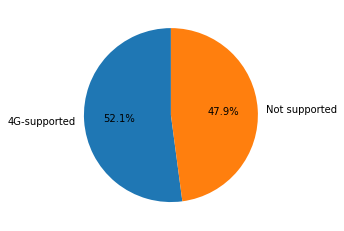

In [28]:
#Let's check the percentage of phone that support 4G
labels = ["4G-supported",'Not supported']
values=df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['four_g'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

([<matplotlib.patches.Wedge at 0x7f8e8b50da50>,
 [Text(-1.0994561299424745, -0.03458638940272202, 'Dual-sim supported'),
  Text(1.0994561299424745, 0.034586389402721386, 'Not supported')],
 [Text(-0.599703343604986, -0.01886530331057564, '51.0%'),
  Text(0.599703343604986, 0.0188653033105753, '49.0%')])

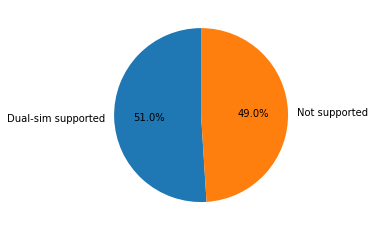

In [29]:
#Let's check the percentage of phone that support dual sim
labels = ["Dual-sim supported",'Not supported']
values=df['dual_sim'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['dual_sim'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

([<matplotlib.patches.Wedge at 0x7f8e8b4de6d0>,
 [Text(-1.099966005495046, -0.008647933583947862, 'Touch creen mobile'),
  Text(1.099966005495046, 0.008647933583948214, 'Not a touch screen mobile')],
 [Text(-0.5999814575427523, -0.004717054682153379, '50.3%'),
  Text(0.5999814575427523, 0.0047170546821535715, '49.7%')])

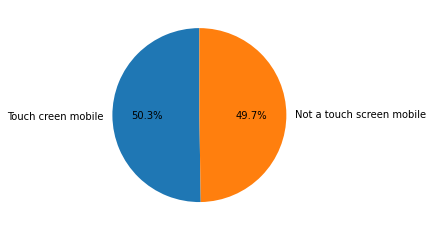

In [30]:
#Let's check the percentage of phone that support touch screen
labels = ["Touch creen mobile",'Not a touch screen mobile']
values=df['touch_screen'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['touch_screen'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

([<matplotlib.patches.Wedge at 0x7f8e8b4371d0>,
 [Text(-1.0996940620621176, -0.025941662732364337, 'wifi supported'),
  Text(1.0996940620621176, 0.02594166273236469, 'Not supported')],
 [Text(-0.5998331247611549, -0.014149997854016909, '50.8%'),
  Text(0.5998331247611549, 0.014149997854017103, '49.2%')])

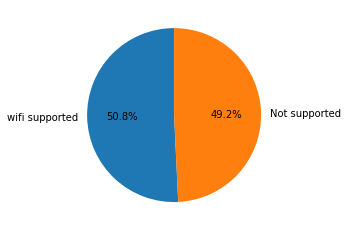

In [31]:
#Let's check the percentage of phone that support wifi
labels = ["wifi supported",'Not supported']
values=df['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(df['wifi'].value_counts(),labels = labels, autopct='%1.1f%%',shadow=False,startangle=90)

In [32]:
# Numeric Features
numeric_features = df.describe().columns
numeric_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


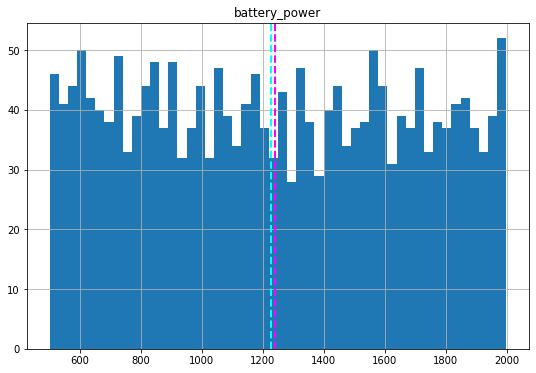

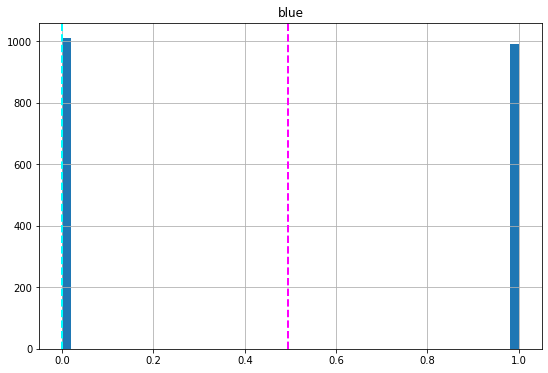

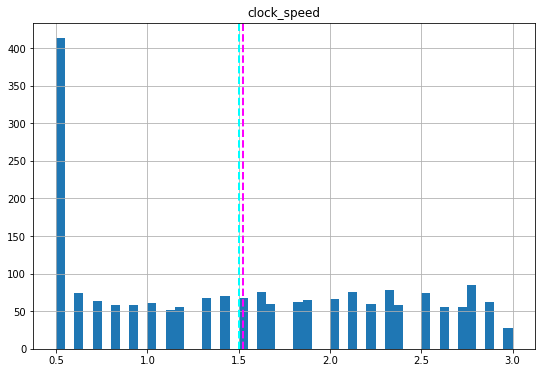

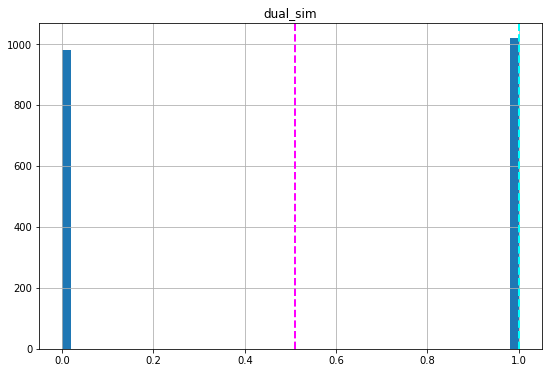

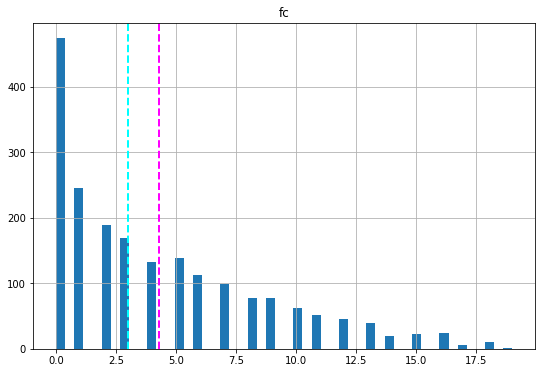

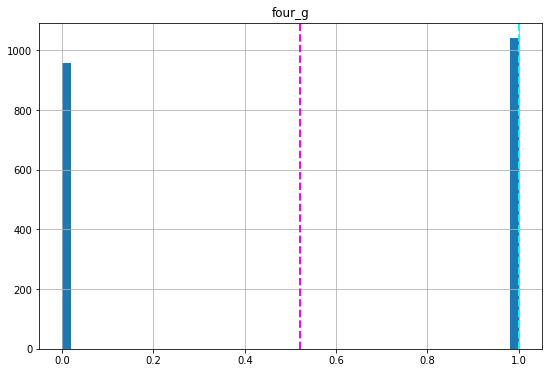

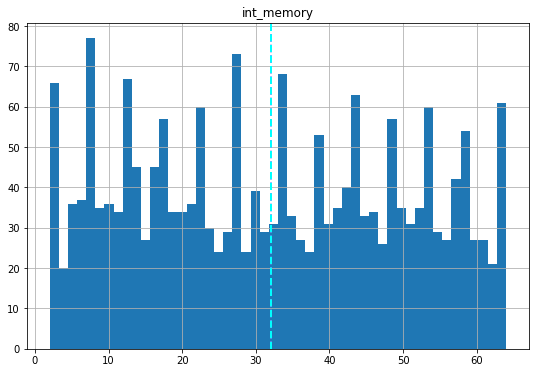

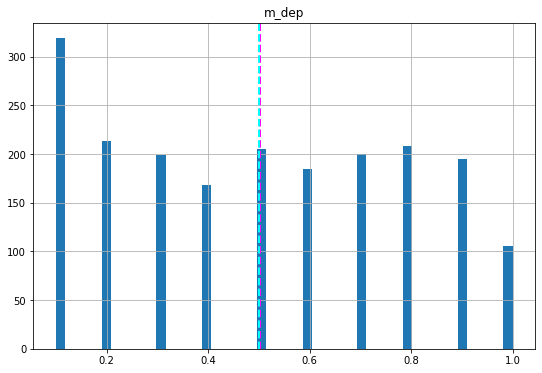

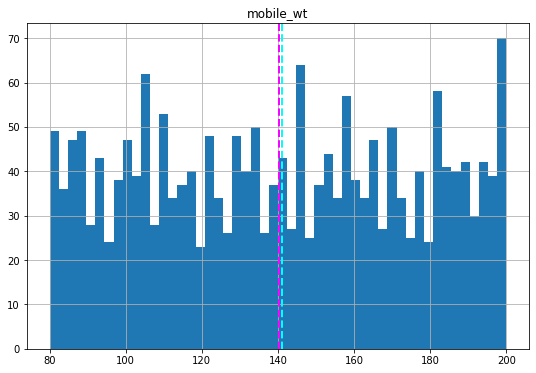

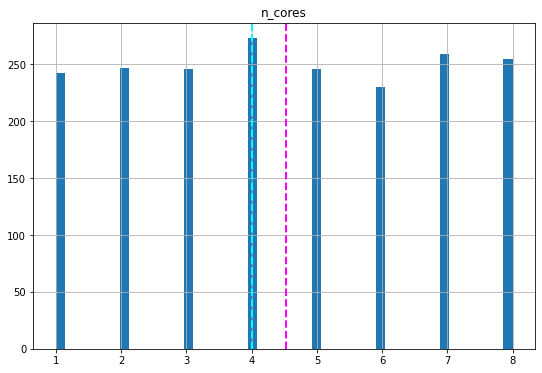

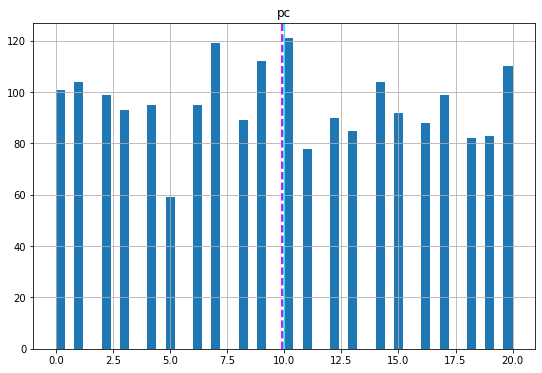

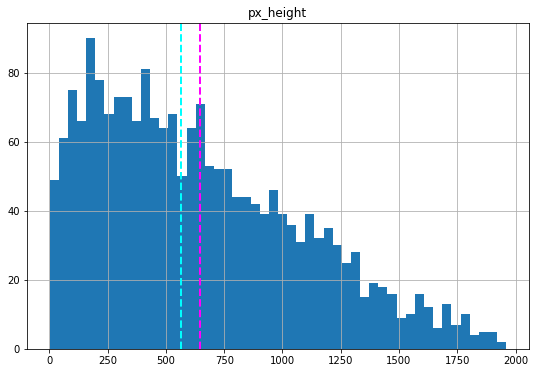

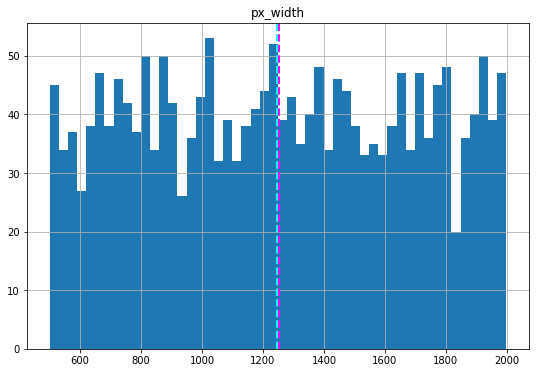

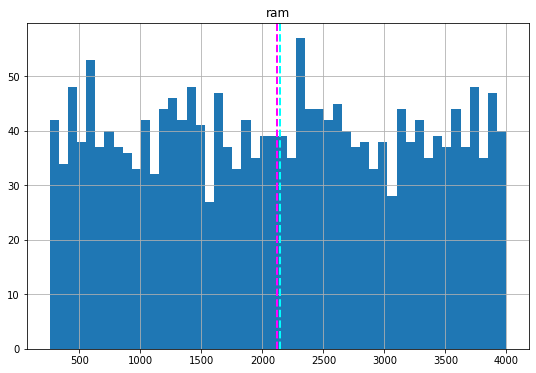

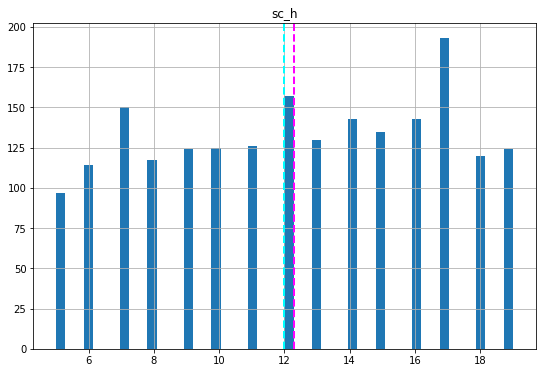

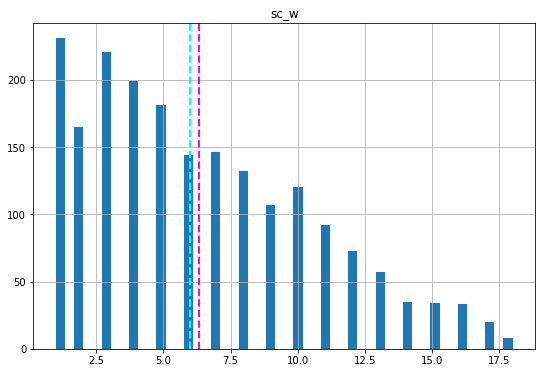

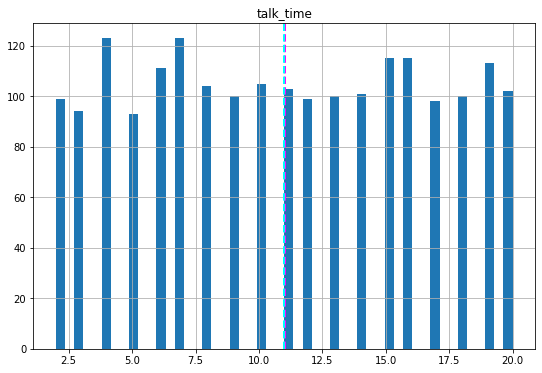

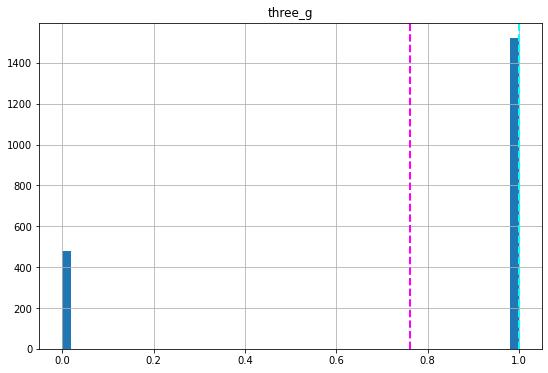

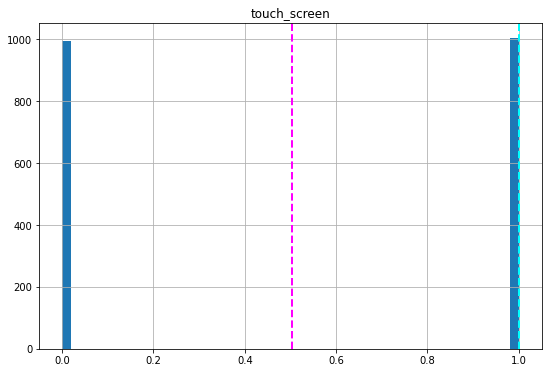

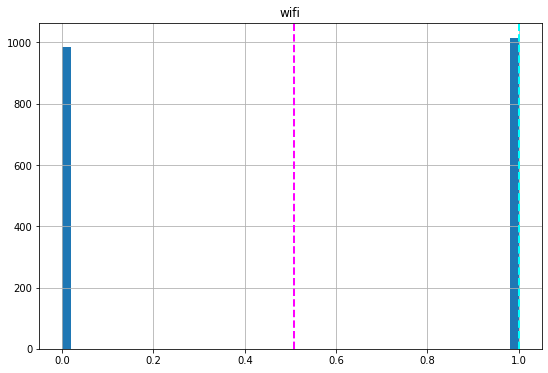

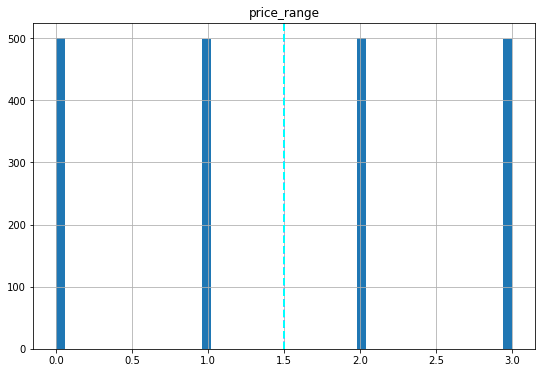

In [33]:
# Ploting of each numeric features
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(),color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(),color = 'cyan', linestyle = 'dashed', linewidth = 2)
  ax.set_title(col)
plt.show()

Since, all the columns in numeric_features except for 'price_range' are independent variables.

Therefore, we do the plotting of the independent variable with 'price_range'.

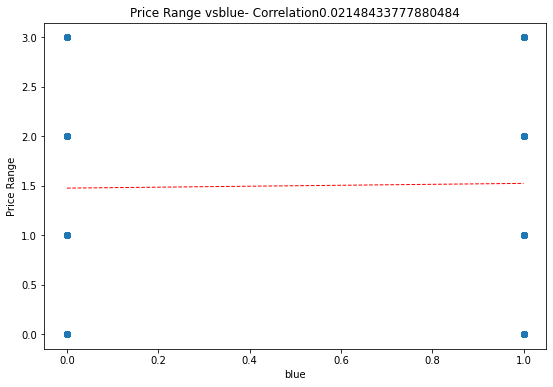

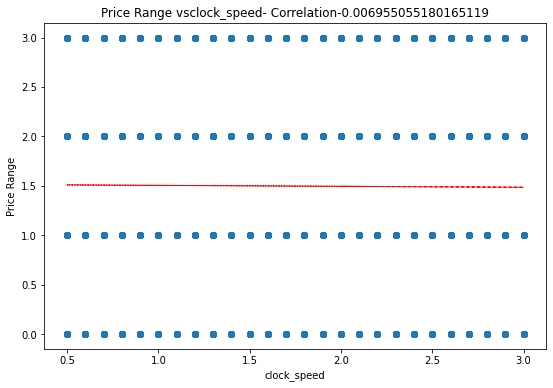

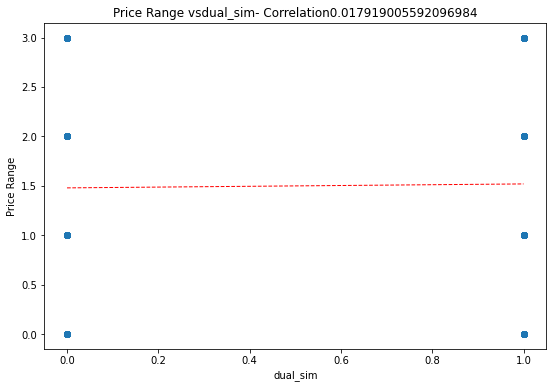

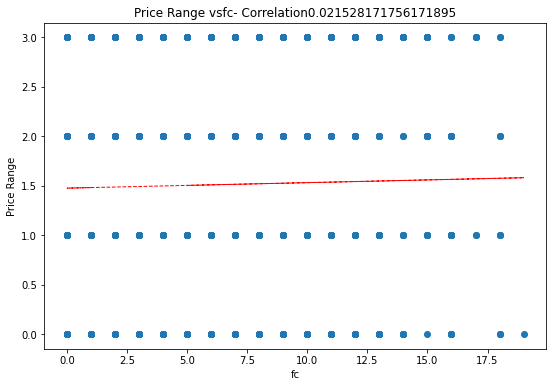

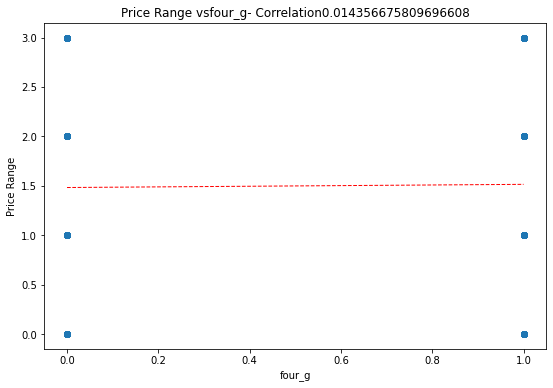

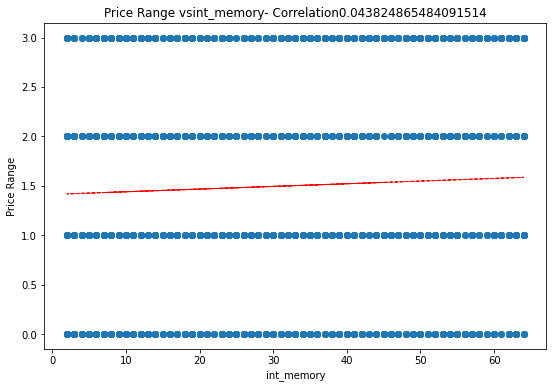

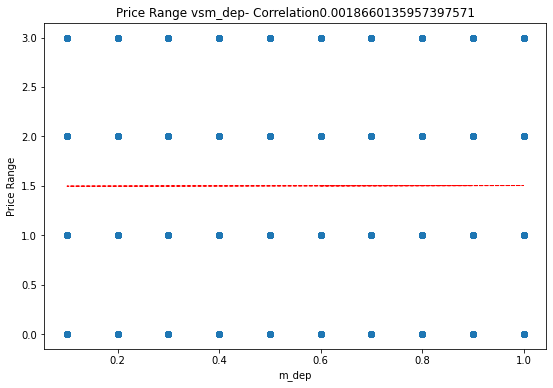

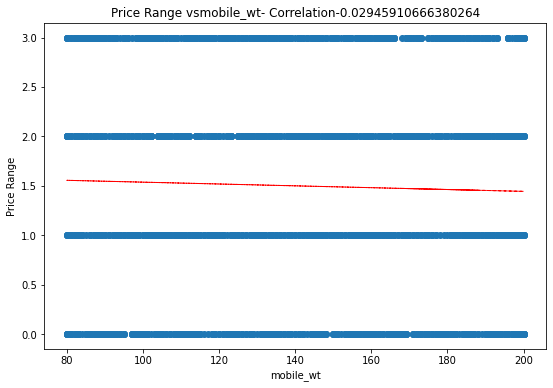

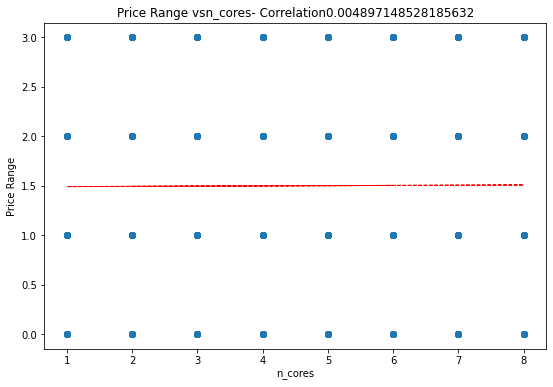

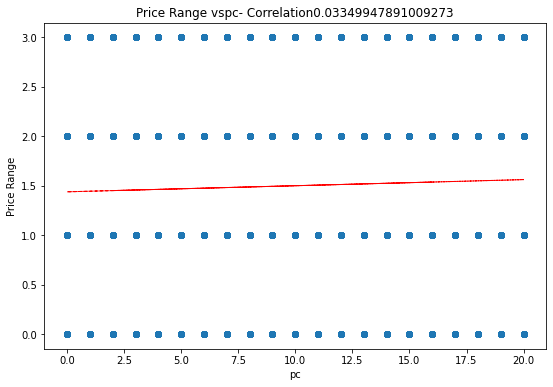

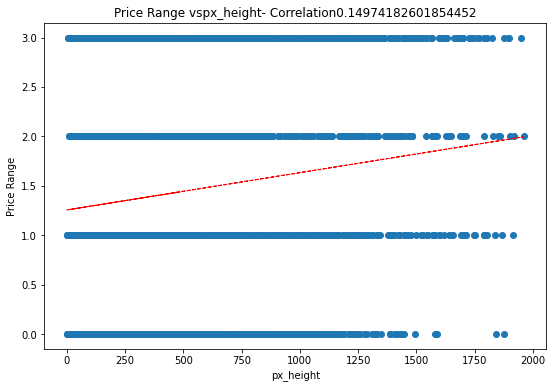

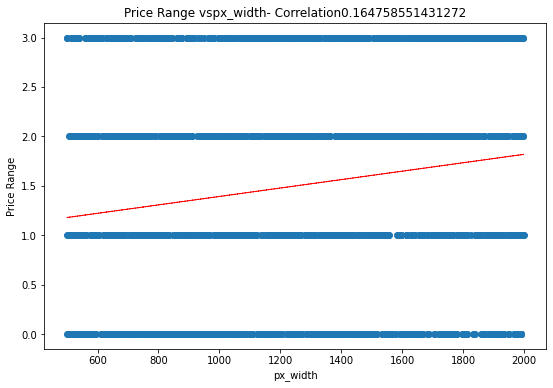

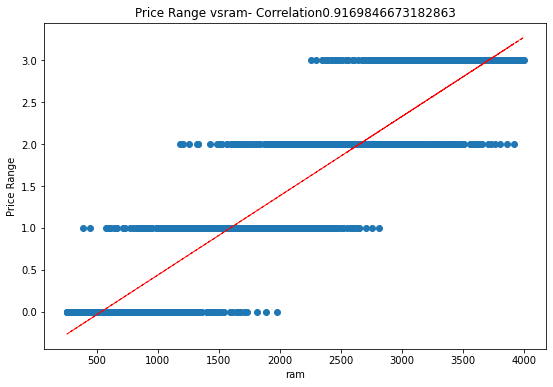

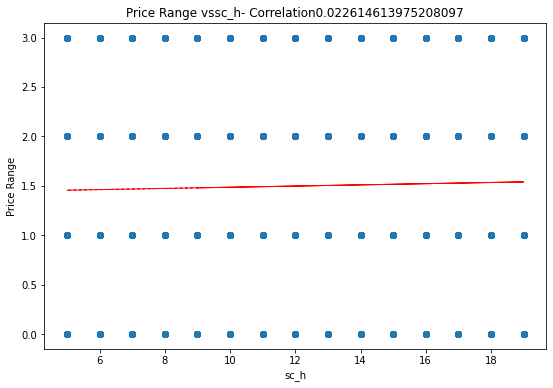

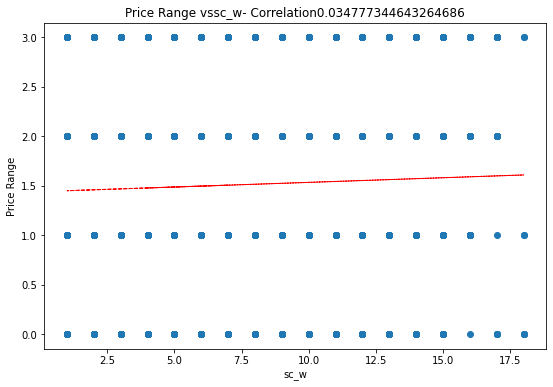

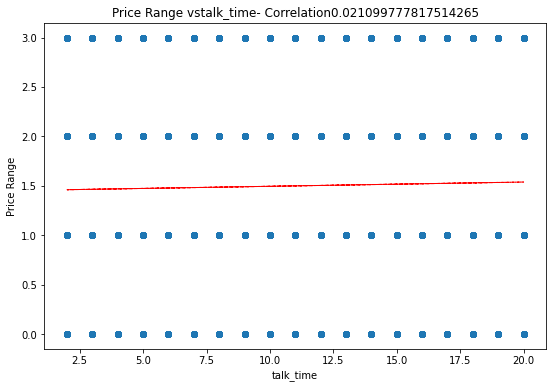

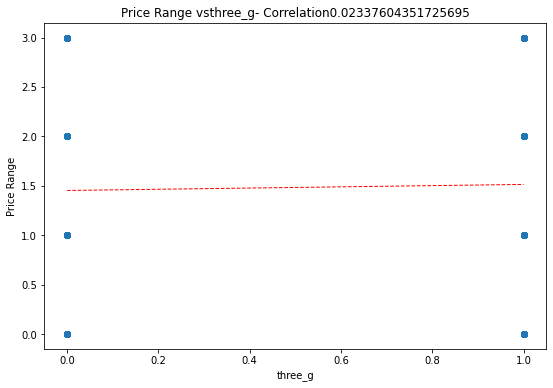

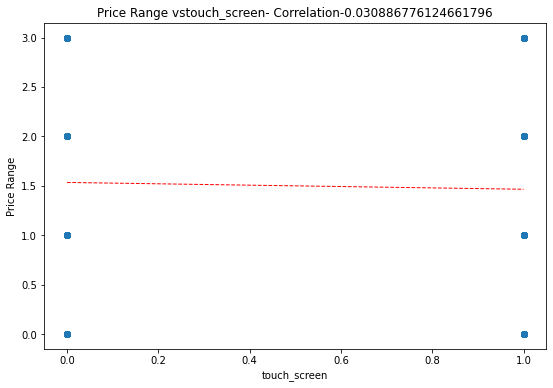

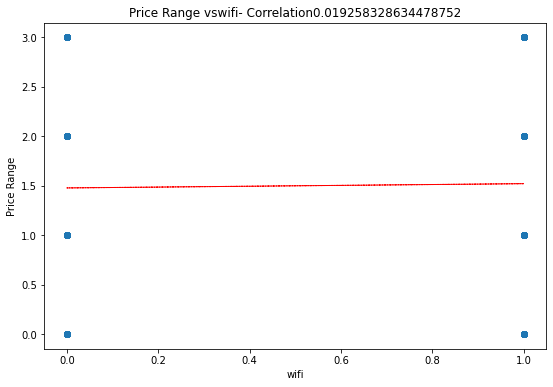

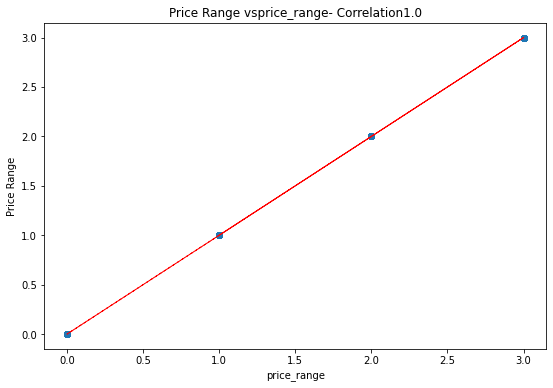

In [34]:
for col in numeric_features[1:]:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['price_range']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Price Range')
  ax.set_title('Price Range vs'+ col + '- Correlation' + str(correlation))
  z = np.polyfit(df[col],df['price_range'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col],y_hat,'r--',lw=1)

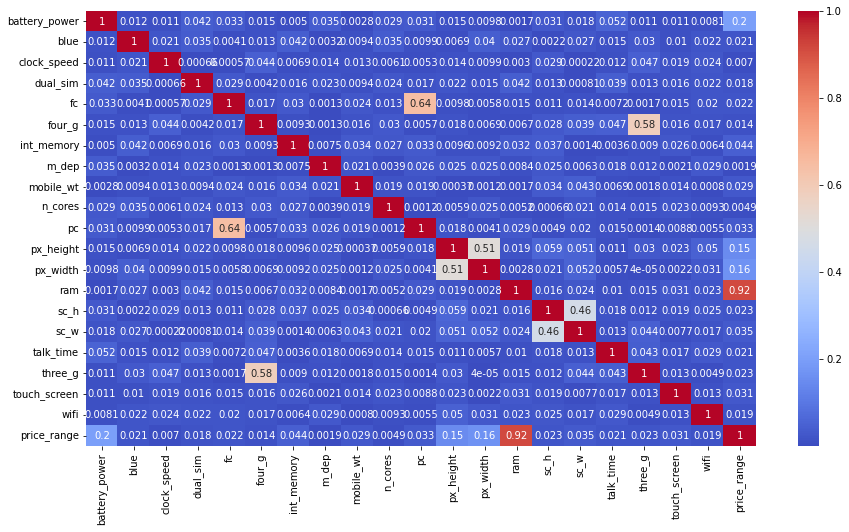

In [35]:
# Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [36]:
# Create a list of independent variables
dependent_variable = 'price_range'

In [37]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
(independent_variables)

['px_height',
 'fc',
 'wifi',
 'four_g',
 'talk_time',
 'blue',
 'n_cores',
 'mobile_wt',
 'touch_screen',
 'int_memory',
 'battery_power',
 'ram',
 'three_g',
 'dual_sim',
 'clock_speed',
 'px_width',
 'sc_w',
 'pc',
 'm_dep',
 'sc_h']

In [38]:
# Create the data of independent variables
X = df[independent_variables].values

In [39]:
# Create the data of dependent variables
y = df[dependent_variable].values

#**Train Test Split**

In [40]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [41]:
print('X_train: ',len(X_train))
print('X_test: ',len(X_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

X_train:  1598
X_test:  400
y_train:  1598
y_test:  400


In [42]:
# Let's scale the data
# creating an object of MinMax Scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)  
X_test_scaled=scaler.transform(X_test)         

In [43]:
X_train_scaled

array([[ 0.04888799,  0.17389359, -1.01513327, ..., -0.46535121,
         0.00454481, -1.02747118],
       [-0.78299718,  1.78413671, -1.01513327, ...,  1.00913239,
         0.69622189, -1.02747118],
       [-1.43726363, -0.97628007, -1.01513327, ..., -1.44834027,
        -1.37880935,  1.12129871],
       ...,
       [-0.63685519,  1.32406724, -1.01513327, ...,  1.33679541,
        -0.68713227, -1.74372781],
       [-1.07977784, -0.5162106 ,  0.98509233, ..., -0.46535121,
         1.38789898,  0.40504208],
       [-0.26138269,  2.01417144,  0.98509233, ...,  1.50062692,
        -1.37880935, -1.02747118]])

In [44]:
X_test_scaled

array([[-0.92014582, -0.74624533, -1.01513327, ..., -1.12067725,
         0.69622189, -1.26622339],
       [-1.42827028, -0.74624533,  0.98509233, ...,  0.02614333,
         0.69622189, -1.02747118],
       [-1.07303282, -0.5162106 , -1.01513327, ..., -0.95684574,
        -0.68713227,  0.64379429],
       ...,
       [ 0.60197922,  0.63396305, -1.01513327, ..., -0.3015197 ,
        -1.37880935, -0.78871897],
       [-0.63910353,  1.09403251,  0.98509233, ...,  1.50062692,
        -0.68713227, -1.26622339],
       [-0.13322741, -0.97628007,  0.98509233, ..., -0.95684574,
        -1.37880935, -0.78871897]])

#**Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)

In [47]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)

In [50]:
# Let's check its accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

1.0

In [52]:
# Confusion Report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[95,  9,  0,  0],
       [ 4, 71, 13,  0],
       [ 0,  7, 91, 10],
       [ 0,  0, 18, 82]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


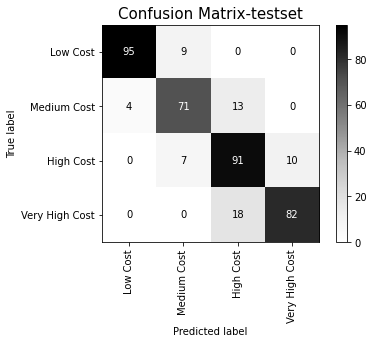

In [55]:
# Let's plotting confusion matrix for test set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc,X_test,y_test,cmap='Greys',display_labels=["Low Cost","Medium Cost","High Cost","Very High Cost"],xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [57]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       104
         1.0       0.82      0.81      0.81        88
         2.0       0.75      0.84      0.79       108
         3.0       0.89      0.82      0.85       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [58]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       396
         1.0       1.00      1.00      1.00       411
         2.0       1.00      1.00      1.00       392
         3.0       1.00      1.00      1.00       399

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



Train set accuracy is 100% and test accuracy is 84%.

The model is overfitted on train set and did not generalised well.

We will tune hyperparamters to reduce overfitting and try to imporve the model performance.

#Hyperparameter Tuning on Decision Tree Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
# Hyperparameter tunning.
grid_values={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

In [63]:
# applying GridSearchCv and fitting the model with it.
dtc_tune=GridSearchCV(dtc,param_grid=grid_values,cv=5,scoring='accuracy',verbose=3)
dtc_tune.fit(X_train,y_train)   

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.322 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.400 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.284 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.317 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.317 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.406 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.391 total time=   0.0s
[CV 3/5] END criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [64]:
# getting best parameters for model.
dtc_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_split': 3,
 'splitter': 'best'}

In [65]:
# getting best estimators
dtc_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3,
                       random_state=0)

In [66]:
# using best parameters and training the the data.
dtc_optimal=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)
dtc_optimal.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [67]:
# predicting y values of train and test set.
y_train_pred=dtc_optimal.predict(X_train)
y_pred=dtc_optimal.predict(X_test)

In [69]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

0.9637046307884856

In [70]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.86

In [71]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[96,  8,  0,  0],
       [ 5, 80,  3,  0],
       [ 0, 10, 88, 10],
       [ 0,  0, 20, 80]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


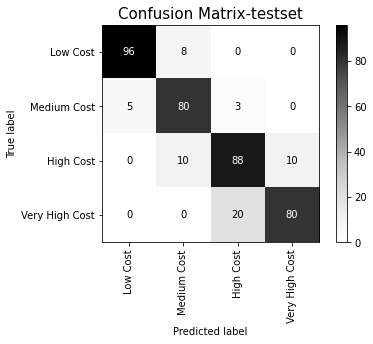

In [73]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc_optimal,X_test,y_test,cmap='Greys',display_labels=["Low Cost","Medium Cost","High Cost","Very High Cost"],xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [74]:
# printing classification report for train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       396
         1.0       0.93      0.97      0.95       411
         2.0       0.97      0.93      0.95       392
         3.0       0.98      0.97      0.98       399

    accuracy                           0.96      1598
   macro avg       0.96      0.96      0.96      1598
weighted avg       0.96      0.96      0.96      1598



In [75]:
# printing classification report for test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       104
         1.0       0.82      0.91      0.86        88
         2.0       0.79      0.81      0.80       108
         3.0       0.89      0.80      0.84       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

